In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [346]:
df = data = pd.read_csv("CleanData/data_2017.csv")
df.sample(5)

,Code du departement,% Voix/Exp,Tendance,Faits de délinquance,Demandeurs,RSA,Depenses
8,30,29.30,d'extrême droite,31857,90690.0,10.185,650
19,57,28.35,d'extrême droite,31667,102190.0,8.600,472
16,52,33.22,d'extrême droite,5304,16680.0,1.587,569
73,87,26.67,gauche,10062,33890.0,3.469,627
13,45,23.53,d'extrême droite,22337,68150.0,6.272,483


In [347]:

df = df.drop([
'% Voix/Exp',
'Code du departement'], axis=1)

display(df)
print(df.Tendance.unique())


,Tendance,Faits de délinquance,Demandeurs,RSA,Depenses
0,d'extrême droite,10652,35290.0,4.324,624
1,d'extrême droite,15428,44170.0,5.407,808
2,d'extrême droite,126695,231270.0,29.058,664
3,d'extrême droite,9312,29450.0,3.340,673
4,d'extrême droite,17281,48940.0,4.406,540
...,...,...,...,...,...
79,d'extrême gauche,10282,41140.0,3.408,599
80,d'extrême gauche,127123,305070.0,42.543,744
81,d'extrême gauche,7084,25460.0,1.704,759
82,d'extrême gauche,22812,69940.0,5.643,595


["d'extrême droite" 'droite' 'gauche' "d'extrême gauche"]


In [348]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

display(df)


,Faits de délinquance,Demandeurs,RSA,Depenses,d'extrême droite,d'extrême gauche,droite,gauche
0,10652,35290.0,4.324,624,True,False,False,False
1,15428,44170.0,5.407,808,True,False,False,False
2,126695,231270.0,29.058,664,True,False,False,False
3,9312,29450.0,3.340,673,True,False,False,False
4,17281,48940.0,4.406,540,True,False,False,False
...,...,...,...,...,...,...,...,...
79,10282,41140.0,3.408,599,False,True,False,False
80,127123,305070.0,42.543,744,False,True,False,False
81,7084,25460.0,1.704,759,False,True,False,False
82,22812,69940.0,5.643,595,False,True,False,False


<Axes: title={'center': 'Correlation matrix heatmap'}>

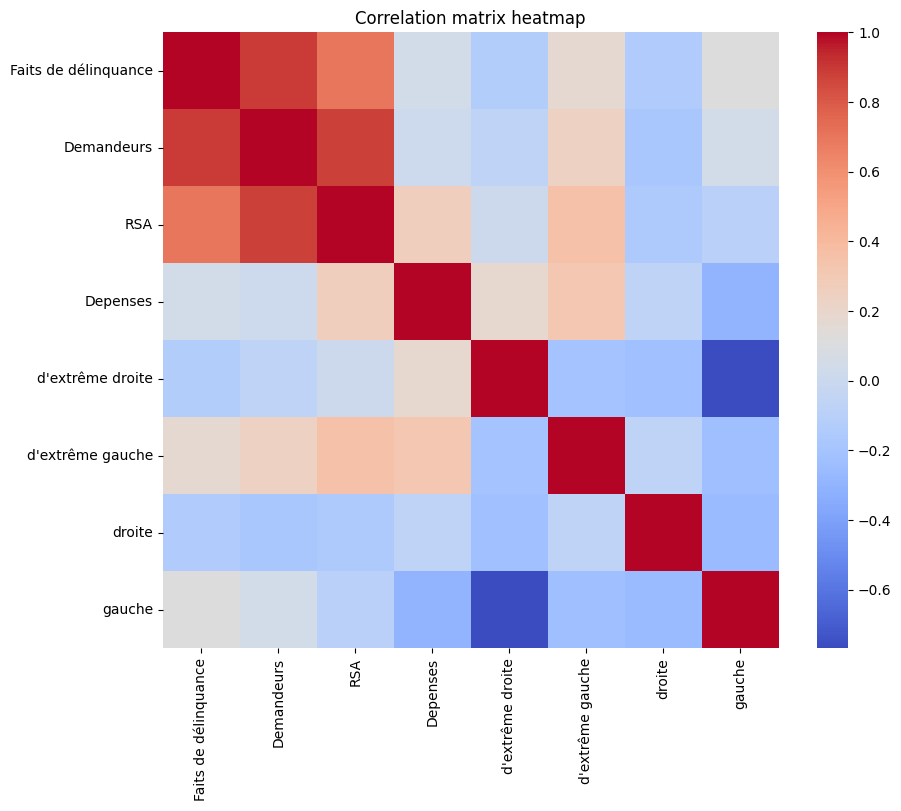

In [349]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

In [350]:
from sklearn.model_selection import train_test_split

X = df.drop(["d'extrême droite", "d'extrême gauche", "gauche", "droite"], axis=1)
Y = df[["d'extrême droite", "d'extrême gauche", "gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,Faits de délinquance,Demandeurs,RSA,Depenses
73,10062,33890.0,3.469,627
0,10652,35290.0,4.324,624
58,67442,135760.0,10.625,471
22,54461,162360.0,22.983,705
12,27269,75090.0,6.137,584
70,10013,32570.0,3.012,523
10,5662,20400.0,2.037,541
18,4903,17380.0,1.733,663
4,17281,48940.0,4.406,540
65,107593,176320.0,16.124,551


76              gauche
42              gauche
49              gauche
11    d'extrême droite
30    d'extrême droite
            ...       
20    d'extrême droite
60              gauche
71              gauche
14    d'extrême droite
51              gauche
Length: 67, dtype: object

73              gauche
0     d'extrême droite
58              gauche
22    d'extrême droite
12    d'extrême droite
70              gauche
10    d'extrême droite
18    d'extrême droite
4     d'extrême droite
65              gauche
40              gauche
47              gauche
35              droite
81    d'extrême gauche
55              gauche
54              gauche
33    d'extrême droite
dtype: object

In [351]:
feature_names = df.drop(["d'extrême droite", "d'extrême gauche", "droite", "gauche"], axis=1).columns.tolist()
feature_names

['Faits de délinquance', 'Demandeurs', 'RSA', 'Depenses']

In [352]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

0.4117647058823529


In [353]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [354]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
Faits de délinquance: 22%
Demandeurs: 17%
RSA: 19%
Depenses: 40%


In [355]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=1500, learning_rate=0.2, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

score Adaboost : 0.6470588235294118


In [356]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}
Accuracy : 0.53


In [357]:

x_new = pd.read_csv("./CleanData/data_2022.csv")

tendances = x_new['Tendance']

x_new = x_new.drop([
'% Voix/Exp',
'Tendance',
'Code du departement'], axis=1)

display(x_new)

# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
display(tests)

,Faits de délinquance,Demandeurs,RSA,Depenses
0,21775,61870.0,4.618,591
1,2894,8240.0,4.610,695
2,11477,32890.0,3.829,642
3,23278,64430.0,4.372,644
4,5686,19700.0,1.453,613
...,...,...,...,...
77,231415,216220.0,10.378,663
78,54411,120670.0,13.454,473
79,105602,186840.0,26.577,863
80,67696,121360.0,12.750,645


,Faits de délinquance,Demandeurs,RSA,Depenses,Tendance
0,21775,61870.0,4.618,591,gauche
1,2894,8240.0,4.610,695,gauche
2,11477,32890.0,3.829,642,gauche
3,23278,64430.0,4.372,644,gauche
4,5686,19700.0,1.453,613,gauche
...,...,...,...,...,...
77,231415,216220.0,10.378,663,d'extrême gauche
78,54411,120670.0,13.454,473,d'extrême gauche
79,105602,186840.0,26.577,863,d'extrême gauche
80,67696,121360.0,12.750,645,d'extrême gauche
